**TEXTURA E COR NA CLASSIFICAÇÃO DE SON**

Descricao do problema:

Manipulacao de dispositivos moveis por meio de comandos de voz: "Yes", "No", "Up", "Down", "Left", "Right", "On", "Off", "Stop", "Go", "Zero", "One", "Two", "Three", "Four", "Five", "Six", "Seven", "Eight", and "Nine".


![texte](cell.jpeg)

Solucao proposta:

![texte](pip.png)

Criando espectrograma simple con pylab:

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


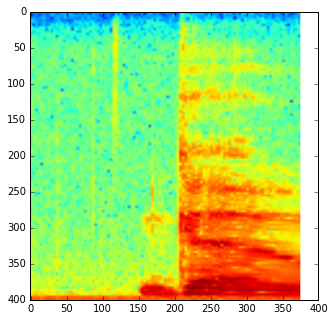

In [33]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
"""
    author: Liz Huancapaza H.
"""


import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import os
import wave
import pylab
from matplotlib.cm import get_cmap
#método para criar espectrogramas
def pylab_spectrogram(wav_file, fileout):
    sound_info, frame_rate = get_wav_info(wav_file)
    #pylab.figure(num=None, figsize=(19, 12))
    pylab.figure(num=None, figsize=(4, 4))
    pylab.subplot(111)
    
    pylab.axis("off")
    pylab.subplots_adjust(0,0,1,1,0,0)
    
    pylab.title('spectrogram of %r' % wav_file)
    #criando espectrograma e adicionando mapa de cor tipo inferno
    pylab.specgram(sound_info, Fs=frame_rate, cmap=get_cmap(plt.cm.inferno))
    pylab.savefig(fileout)

def get_wav_info(wav_file):
    wav = wave.open(wav_file, 'r')
    frames = wav.readframes(-1)
    sound_info = pylab.fromstring(frames, 'Int16')
    frame_rate = wav.getframerate()
    wav.close()
    return sound_info, frame_rate

#inicio
if __name__ == "__main__":
    #palabra yes
    inpf = "0a9f9af7_nohash_0.wav"
    outf = "spectogram1.png"
    pylab_spectrogram(inpf, outf)
    img = mpimg.imread("spectogram1.png")
    plt.gca().clear()
    plt.imshow(img)




---

Criando espectrograma do tipo log melspectrogram:

/usr/lib/python3/dist-packages/scipy/misc/pilutil.py:479: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if issubdtype(ts, int):
/usr/lib/python3/dist-packages/scipy/misc/pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


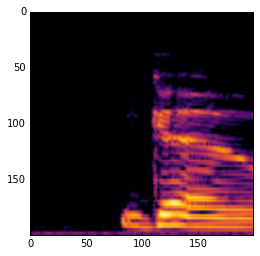

In [5]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
"""
    author: Liz Huancapaza H.
"""
import numpy as np
from scipy.signal import spectrogram
import librosa
import matplotlib.pyplot as plt
import scipy
import os
import matplotlib.image as mpimg

import wave
import pylab
from matplotlib.cm import get_cmap
#Metodo que cria espectrogramas do tipo log melspectrogram
def log_mel_spectrogram(inputfile, outfile): 

    out_rate = 22050
    frames, rate = librosa.load(inputfile, sr=out_rate, mono=True)
    audio_data = frames 
    samplerate = rate
    
    n_mels=128
    n_fft=512
    hop_length=160
    spec_width = 200
    spec_height = 200
    #mapa de color inferno
    speccmap = plt.cm.inferno

    spectrogram = librosa.feature.melspectrogram(
                    audio_data, sr=samplerate, n_mels=n_mels,
                    n_fft=n_fft, hop_length=hop_length)

    # convert to log scale (dB)
    log_spectrogram = librosa.amplitude_to_db(spectrogram, ref=np.max)

    specMatrixDB1 = np.flipud(log_spectrogram)
    norm = plt.Normalize(vmin=specMatrixDB1.min(), vmax=specMatrixDB1.max())
    #para colorir
    image = speccmap(norm(specMatrixDB1))        
    newImage = scipy.misc.imresize(image, (spec_height, spec_width))
    plt.imsave(outfile, newImage)
    
#inicio 
if __name__ == "__main__":
    inpf = "0a9f9af7_nohash_0.wav"
    outf = "spectogram2.png"
    log_mel_spectrogram(inpf, outf)
    img = mpimg.imread("spectogram2.png")
    plt.gca().clear()
    plt.imshow(img)

---

**Descriptor de textura Gray Level Co-ocorrence Matrix (GLCM):**
1. Convertir a imagem colorida do espectograma em niveis de cinza.
2. Dado n as variacoes de deslocamento dx e dy, calcular as matrices de co-ocorrencia.
3. Normalizar as n matrices de co-ocorrencia.
4. Computar as 6 Medidas de Haralick: *Maximum probability, Correlation, Contrast, Energy, Homogeneity e Entropy*.

![texte](texture.jpg)

Implementacao do metodo Gray Level Co-ocorrence Matrix com as 6 medidas estadisticas do Haralick.

In [44]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
"""
    author: Liz Huancapaza H.
"""
import math
import imageio

def GLCooMatrix(dx, dy, img):
  # dx, dy: variacoes de deslocamento
  #fe  : retorna o vetor de carateristicas 

    fe = []
    grayscales = convert2gray(img)
    
    _n = len(dy)
    _size = 256
#n desloc por cada matriz de coocorrencia
    _mat = [ [ [0.0 for i in range(_size)] for j in range(_size)] for k in range(_n)]
    _sum = [0.0 for i in range(_n)]
    
    h=img.shape[0]
    w=img.shape[1]

    for x in range(w):
        for y in range(h):
            for i in range(_n):
                xj = int(dx[i]+x)
                yj = int(dy[i]+y)
                # condiciones para xj e yj
                if xj>=0 and xj<w and yj>=0 and yj<h:
                    gi = int(grayscales[y][x])
                    gj = int(grayscales[yj][xj])
                    
                    _mat[i][gi][gj] += float(1.0)
                    _sum[i] += int(1)
    #declarando array para las caract. de las n matrices de coocorrencia
    _ene  = [0.0 for i in range(_n)]
    _ent  = [0.0 for i in range(_n)]
    _con  = [0.0 for i in range(_n)]
    _corr = [0.0 for i in range(_n)]
    _hom  = [0.0 for i in range(_n)]
    _pobmax = [0.0 for i in range(_n)]

    mr = [0.0 for i in range(_n)]
    mc = [0.0 for i in range(_n)]
    o_r = [0.0 for i in range(_n)]
    o_c = [0.0 for i in range(_n)]
    
    sumr = [ [0.0 for j in range(256)] for i in range(_n)]
    sumc = [ [0.0 for j in range(256)] for i in range(_n)]
    
    #/*normalization*/
    for i in range(_size):
        for j in range(_size):
            for k in range(_n):
                _mat[k][i][j]/=float(_sum[k])
                sumr[k][i]+=float(_mat[k][i][j])
                sumc[k][j]+=float(_mat[k][i][j])


    #calcula mr e mc
    for i in range(_size):
        vi = i+1
        for k in range(_n):
            mr[k] += (vi)*sumr[k][i]
            mc[k] += (vi)*sumc[k][i]
    
    #calcula o_r e o_c
    for i in range(_size):
        vi = i+1
        for k in range(_n):
            o_r[k] += ((vi-mr[k])*(vi-mr[k]))*sumr[k][i]
            o_c[k] += ((vi-mc[k])*(vi-mc[k]))*sumc[k][i]
    
    #/*calculate 6 measures of Haralick*/
    for i in range(_size):
        vi = i+1
        for j in range(_size):
            for k in range(_n):      
                vj = j+1
                pij = _mat[k][i][j]
                i_j = vi - vj
                if pij!=0.0:
                    _ene[k] += pij*pij
                    _ent[k] += pij*(math.log(pij)/math.log(2.0))
                    _con[k] += pij*(i_j*i_j)
                    _hom[k] += pij/(1+math.fabs(i_j))
                    if o_r[k]!=0.0 and o_c[k]!=0.0:
                        _corr[k] += ((vi-mr[k])*(vj-mc[k])*pij)/(o_r[k]*o_c[k])
                    if pij > _pobmax[k]:
                        _pobmax[k] = float(pij)

    for k in range(_n):
        _ent[k] *= -1.0
        
    i = 0
    for k in range(_n):
        fe.append(_ene[k])
        fe.append(_ent[k])
        fe.append(_con[k])
        fe.append(_corr[k])
        fe.append(_hom[k])
        fe.append(_pobmax[k])
        
    return fe

def convert2gray(image):
    #Converte a imagem colorida em niveis de cinza
    # gray: array com os niveis de cinza
    h=image.shape[0]
    w=image.shape[1]
    gray = [ [0 for j in range(w)] for i in range(h)]
    for row in range(h):
        for col in range(w):
            r = 0.299*float(image[row,col,0])
            g = 0.587*float(image[row,col,1])
            b = 0.114*float(image[row,col,2])
            gray[row][col] = int(r + g + b)
    return gray

img = imageio.imread("spectogram2.png")
dx = [0,0,0,1,3,5]
dy = [1,3,5,0,0,0]
fe = GLCooMatrix(dx, dy, img)
print (fe)


[0.43306334309737743, 5.14146027858929, 127.47967336683615, 0.0004853381080319288, 0.7115255223516962, 0.6580402010050251, 0.4186057409364607, 5.395404635209503, 498.1109898477201, 0.0004371080000940285, 0.68022446287846, 0.6469543147208122, 0.4093393464825745, 5.462079343638508, 745.2664871794776, 0.0004063516456558291, 0.6696653110323888, 0.6397435897435897, 0.4347662407514805, 4.897436448544623, 25.744447236181532, 0.0004990614598891967, 0.7663146699962096, 0.659321608040201, 0.4200259475895207, 5.244141776785542, 140.28048223350328, 0.0004832631865150378, 0.7152896941323921, 0.6480456852791878, 0.41061886127547254, 5.3902435678868965, 258.66376923076456, 0.0004671112724817778, 0.6955462142790908, 0.6407435897435897]


---

**Descriptor de cor Border Interior Classification (BIC):**
1. Quantizar a cor em 64 cores, 2 bits por canal.
3. Criar 2 histogramas de 64 dimensoes cada, para classificar pixeis na borda e no interior.
4. Sao considerados pixeis no interior cuando seus 4 vizinhos possuem a mesma cor.
5. Caso contrario a cor do pixel é considerado na borda.

![texte](bic.png)


Implementacao do metodo Border Interior Classification

In [3]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

"""
    author: Liz Huancapaza H.
"""
import imageio
import math
import cmath

def BIC(img):
    #img : imagem
    #fe  : retorna o vetor de carateristicas 
 
    n = 128
    fe = [0.0 for i in range(n)]
    data = reduceColor64(img)
    half = int(n/2.0)
    h=img.shape[0]
    w=img.shape[1]


    for i in range(1, h-1):
        for j in range(1, w-1):
            color = data[i*w+j]
            n1 = data[(i-1)*w+j]
            n2 = data[(i+1)*w+j]
            n3 = data[i*w+(j-1)]
            n4 = data[i*w+(j+1)]


            #// se os 4 vizinhos e o  pixel central forem iguais....
            if color == n1 and color == n2 and color == n3 and color == n4:
                #// acumula no interior... na segunda metade do histograma
                fe[half+color] += 1.0
            else:
                
                #// acumula como borda...
                fe[color] += 1.0
    return fe

def reduceColor64(img):
    #Reduce a cor da imagem em 64 cores
    #data: array representando aos pixeis contendo o id da cor

    h=img.shape[0]
    w=img.shape[1]
    
    #numero de pixeis
    n = w*h
    
    #(2**b)**3 64 colores; b = numero de bits
    b = 2
    
    #8 - 2 bits para criar a marcara de bits
    r = 8 - b
    
    #maskBit = 255
    maskBit = 0xFF
    #zerar os r primeiros bits da mascara
    maskBit = maskBit << r
    
    data = [ 0 for i in range(n)]
    for i in range (h):
        for j in range (w):
            idx = i*w+j
            C1 = (img[i,j,0] & maskBit)
            C2 = (img[i,j,1] & maskBit)
            C3 = (img[i,j,2] & maskBit)
            
            #gera o id para a cor do pixel entre 0 até 63
            data[idx] = (C1>>2) | (C2>>4) | (C3>>6)

    return data

img = imageio.imread("spectogram2.png")
fe = BIC(img)
print (fe)


[1073.0, 1125.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 48.0, 2269.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 2058.0, 0.0, 0.0, 34.0, 79.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 215.0, 0.0, 0.0, 1148.0, 607.0, 0.0, 0.0, 736.0, 50.0, 0.0, 0.0, 63.0, 87.0, 17.0, 0.0, 27247.0, 122.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 965.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 628.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 402.0, 11.0, 0.0, 0.0, 204.0, 0.0, 0.0, 0.0, 0.0, 8.0, 0.0, 0.0]


@LizHuancapaza :)